<a href="https://colab.research.google.com/github/cstecker/comparative_politics/blob/main/B%C3%BCrgerbegehren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Datenbank Bürgerbegehren**

Im Projekt "*Datenbank Bürgerbegeheren*" der Bergischen Universität Wuppertal werden Daten und Informationen über Bürgerbescheide in Deutschland erhoben und ausgewertet. Der Website nach stellen sich die Daten wie folgt zusammen:

"*Die Daten wurden in Umfragen bei den Innenministerien, Landtagen, kommunalen Spitzenverbänden und Kreisverwaltungen erhoben sowie seit dem Jahr 2000 durch laufende Mediendokumentationen ermittelt. Darüber hinaus wurden weitere Daten durch Fragebogenerhebungen bei Kreisen und Gemeinden gewonnen. Ein weiterer Anteil von Daten stammt aus verifizierten Selbstmeldungen von Initiatoren, Medienvertretern und engagierten Bürgern.*"

Die Daten wurden uns für diesen Kurs freundlicherweise zur Verfügung gestellt. Wir werden diese aus dem Dropbox-Ordner, zu dem Sie hinzugefügt wurden, einlesen. Das funktioniert, indem man den read.csv Befehl nutzt, und dort den Link zum Teilen der Daten aus Dropbox einfügt. Zusätzlich muss die *dl=0* am ende durch *dl=1* ersetzt werden. 

In [94]:
df <- read.csv("https://www.dropbox.com/s/oqbj9fr9hjyeweb/export-20230426101124.csv?dl=1")
head(df)

,Export...Datenbank.Bürgerbegehren...26.04.2023.10.11.24,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15,X.16
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,,,,,,,,,,,,,,,,,,
2,Begehren ID,Ort,BL-Abkürzung,Bundesland,Gebietskategorie,AGS,RS,Jahr,Thema-Bürgerbegehren,Ergebnis,Themenbereich,Verfahrenstyp,BE-Datum,BE-Ja-Stimmenanteil,BE-Nein-Stimmenanteil,BE-Beteiligung,Status,Einwohnerzahl
3,6,"Hörnitz (OT von Bertsdord-Hörnitz, ehem. selbstständig)",SAC,Sachsen,Gemeinde,0,0,1994,Für Gründung einer Verwaltungsgemeinschaft,BB nur öffentlich diskutiert,Gebietsreform,1. c (genauer) Korrekturbegehren mit Alternativvorschlag,,0,0,0,Verfahren abgeschlossen,1209
4,48,"Arnsfeld (OT von Mildenau, ehem. selbstständig)",SAC,Sachsen,Gemeinde,0,0,1995,Für Verwaltungsgemeinschaft mit Mildenau,BE im Sinne des Begehrens,Gebietsreform,2. a (genauer:) Ratsreferendum: auf Eigeninitiative des Rats,30.11.1994,0,0,0,Verfahren abgeschlossen,1106
5,50,Bösenbrunn,SAC,Sachsen,Gemeinde,14523060,145235122060,1996,"Gegen Beitritt zum Verwaltungsverband Oelsnitz, für Beibehaltung Selbstständigkeit",BE nicht im Sinne des Begehrens,Gebietsreform,1. b (genauer:) Korrekturbegehren,15.10.1996,0,0,0,Verfahren abgeschlossen,1174
6,54,"Ebersbrunn (OT von Lichtentanne, ehem. selbstständig)",SAC,Sachsen,Gemeinde,0,0,1996,Gegen Beitritt zur Einheitsgemeinde Lichtentanne,BE im Sinne des Begehrens,Gebietsreform,2. Ratsreferendum,30.11.1995,0,0,0,Verfahren abgeschlossen,1230


Wie wir sehen gibt es ein Problem, die Variablennamen stehen in der dritten Zeile. Daher nutzen wir den Befehl "row_to_names" aus dem Package Janitor, um R zu sagen in welcher Zeile sich die Variablennamen befinden.

In [95]:
library(dplyr)
install.packages("janitor")
library(janitor)
df <- df %>% row_to_names(row_number = 2)
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Begehren ID,Ort,BL-Abkürzung,Bundesland,Gebietskategorie,AGS,RS,Jahr,Thema-Bürgerbegehren,Ergebnis,Themenbereich,Verfahrenstyp,BE-Datum,BE-Ja-Stimmenanteil,BE-Nein-Stimmenanteil,BE-Beteiligung,Status,Einwohnerzahl
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3,6,"Hörnitz (OT von Bertsdord-Hörnitz, ehem. selbstständig)",SAC,Sachsen,Gemeinde,0,0,1994,Für Gründung einer Verwaltungsgemeinschaft,BB nur öffentlich diskutiert,Gebietsreform,1. c (genauer) Korrekturbegehren mit Alternativvorschlag,,0,0,0,Verfahren abgeschlossen,1209
4,48,"Arnsfeld (OT von Mildenau, ehem. selbstständig)",SAC,Sachsen,Gemeinde,0,0,1995,Für Verwaltungsgemeinschaft mit Mildenau,BE im Sinne des Begehrens,Gebietsreform,2. a (genauer:) Ratsreferendum: auf Eigeninitiative des Rats,30.11.1994,0,0,0,Verfahren abgeschlossen,1106
5,50,Bösenbrunn,SAC,Sachsen,Gemeinde,14523060,145235122060,1996,"Gegen Beitritt zum Verwaltungsverband Oelsnitz, für Beibehaltung Selbstständigkeit",BE nicht im Sinne des Begehrens,Gebietsreform,1. b (genauer:) Korrekturbegehren,15.10.1996,0,0,0,Verfahren abgeschlossen,1174
6,54,"Ebersbrunn (OT von Lichtentanne, ehem. selbstständig)",SAC,Sachsen,Gemeinde,0,0,1996,Gegen Beitritt zur Einheitsgemeinde Lichtentanne,BE im Sinne des Begehrens,Gebietsreform,2. Ratsreferendum,30.11.1995,0,0,0,Verfahren abgeschlossen,1230
7,56,"Geyersdorf (OT von Annaberg-Buchholz, ehem. selbstständig)",SAC,Sachsen,Gemeinde,0,0,1997,Gegen Eingemeindung nach Annaberg-Buchholz,BE im Sinne des Begehrens,Gebietsreform,1. b (genauer:) Korrekturbegehren,30.11.1996,0,0,0,Verfahren abgeschlossen,1174
8,57,"Greifendorf (OT von Rossau, ehem. selbstständig)",SAC,Sachsen,Gemeinde,0,0,1994,Für Eingemeindung nach Rossau,BE im Sinne des Begehrens,Gebietsreform,2. a (genauer:) Ratsreferendum: auf Eigeninitiative des Rats,30.11.1993,0,0,0,Verfahren abgeschlossen,500


## **Überblick über die Daten**

Am Anfang ist es immer gut, wenn man sich einen Überblick über die Datenverschafft, um besser zu verstehen, womit man es zu tun hat. Außerdem können dabei bereits hilfreiche deskriptive Statistiken entstehen.

Zuerst schauen wir uns an welches Bundesland die meisten Anträge gestellt hat.

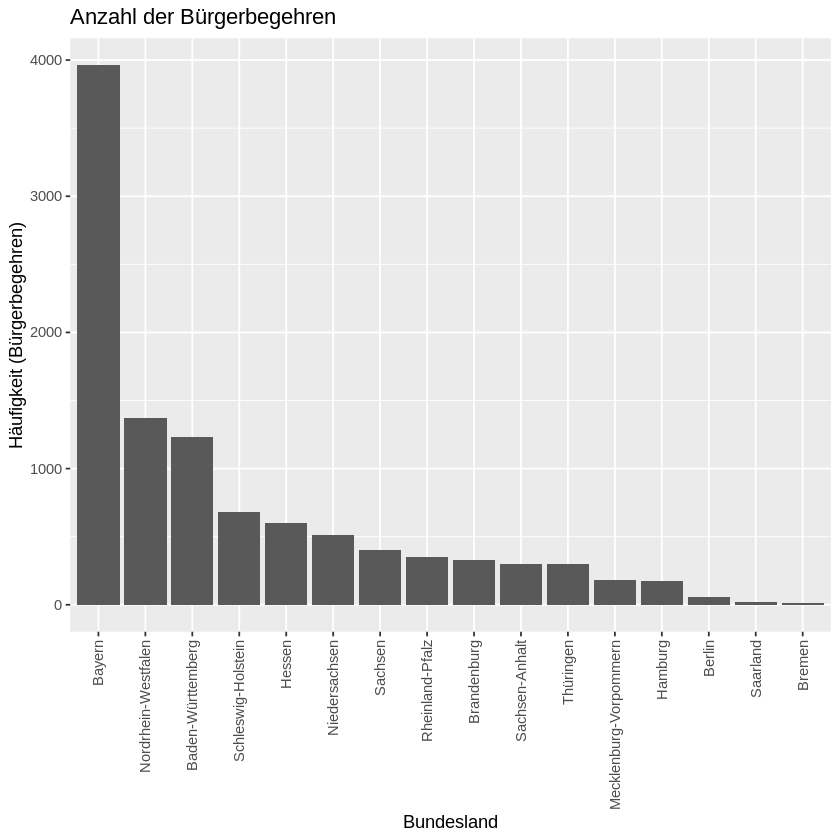

In [96]:
library(ggplot2)

# Zuerst erstellen wir eine Tabelle, welche die Häufigkeiten des Auftreten jedes Bundeslands in dem Datensatz misst
freq_table <- table(df$Bundesland)

# Diese Tabelle konvertieren wir dann wieder in einen Datensatz und bennen die Variablen
freq_df <- data.frame(Bundesland = names(freq_table), frequency = as.numeric(freq_table))

# Zur Übersichtilichkeit ordnen wir die Bundesländer nun nach der Häufigkeit der Bürgerbegehren
freq_df <- freq_df[order(-freq_df$frequency),]

# Nun können wir mit diesem Datensatz einen simplen Bar-Plot erstellen. Dabei wenden wir für die X Axe nun reorder() an, damit die Balken der angegebenen Ordnung nach sortiert werden.
ggplot(freq_df, aes(x = reorder(Bundesland, -frequency), y = frequency)) + 
  geom_bar(stat = "identity") + 
  labs(title = "Anzahl der Bürgerbegehren", x = "Bundesland", y = "Häufigkeit (Bürgerbegehren)") + 
  #Nun brauchen wir noch einen Code, der dafür sorgt, dass die Namen der Bundesländer auf der X-Axe vertikal sind, damit die Grafik überischtlich bleibt.
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

Wir können nun erkennen, dass die meisten Anträge mit Abstand aus Bayern kommen. Die wenigsten hingegen kommen aus bremen. Warum? Es scheint so, dass Bundesländer mit mehr Einwohnern auch mehr Anträge stellen. Klingt logisch! 

Jedoch ist es ungewöhnlich, dass Bayern so viel mehr Anträge stellt. Ein Grund dafür ist, dass in Bayern gesetzliche Hürden dafür vergleichsweise gering sind. Was könnten weitere Gründe sein?

Schauen wir doch einfach mal nach, ob es tatsächlich so logisch ist, dass eine höhere Anzahl an Einwohner*innen auch mehr Bürgerbegehren hervorbringt. Dafür teilen wir die Einwohnerzahlen in sechs Kategorien. 

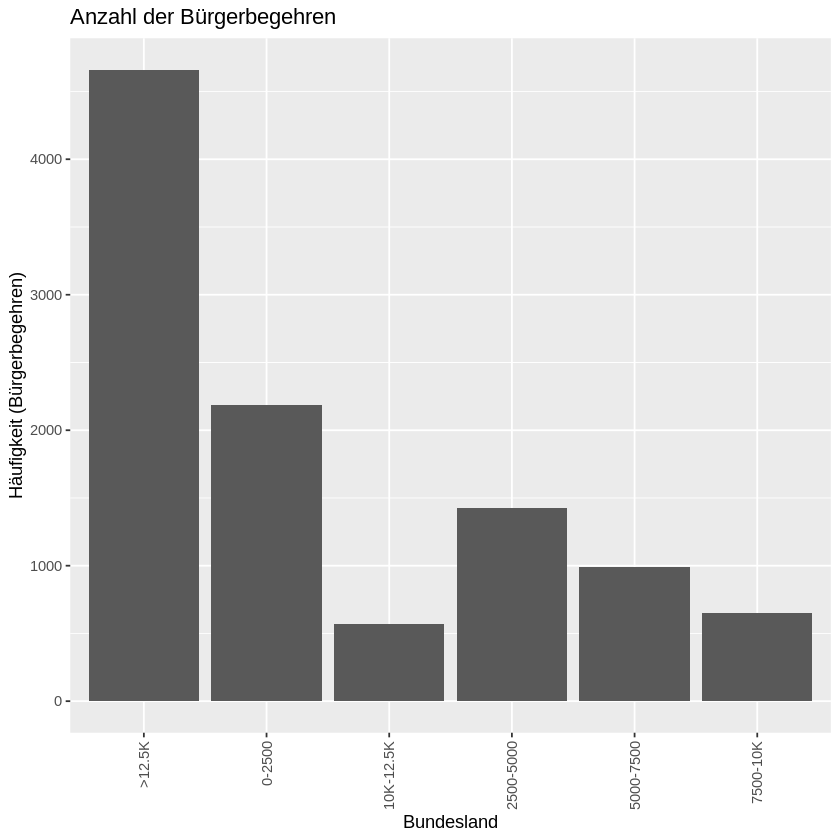

In [ ]:
# Zuerst unterteilen wir die Variable der Anzahl der Einwohner in sechs Kategorien
df$Einwohnerzahl <- as.numeric(df$Einwohnerzahl)
df$cat_einwohner <- cut(df$Einwohnerzahl,
                       breaks=c(0, 2500, 5000, 7500, 10000, 12500, 1500000),
                       labels=c('0-2500', '2500-5000', '5000-7500', '7500-10K', '10K-12.5K', '>12.5K'))

# Der Rest läuft ab wie zuvor.
freq_table3 <- table(df$cat_einwohner)

# Diese Tabelle konvertieren wir dann wieder in einen Datensatz und bennen die Variablen
freq_df3 <- data.frame(Einwohner = names(freq_table3), frequency = as.numeric(freq_table3))

# Nun können wir mit diesem Datensatz einen simplen Bar-Plot erstellen.
ggplot(freq_df3, aes(x = Einwohner, y = frequency)) + 
  geom_bar(stat = "identity") + 
  labs(title = "Anzahl der Bürgerbegehren", x = "Einwohnerzahl", y = "Häufigkeit (Bürgerbegehren)") + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

Hmm... Scheinbar hat sich die Vermutung über die Einwohnerzahl nicht bewahrheitet! Zwar haben Ortschaften mit den höchsten Einwohnerzahlen deutlich die meisten Anträge gestellt, jedoch sind auf dem zweiten Platz bereits die Orte mit den wenigsten Einwohnern! Und auch die anderen Beobachtungen sprechen nicht direkt dafür. 

Aber wie hat sich die Anzahl der Anträge eigentlich über die Zeit verändert?

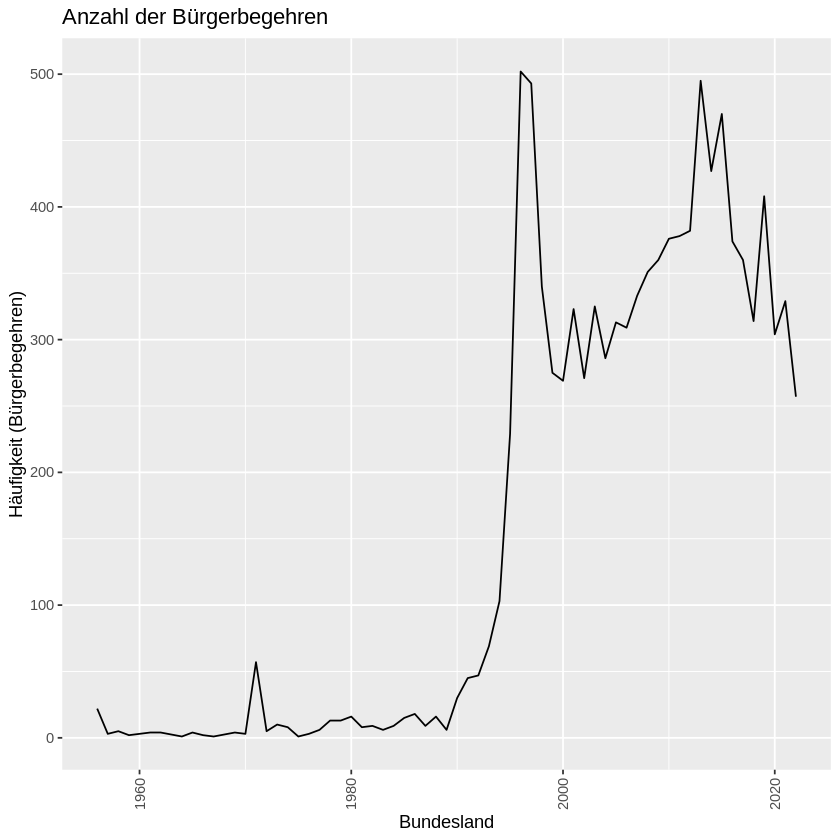

In [ ]:
freq_table2 <- table(df$Jahr)

freq_df2 <- data.frame(Jahr = names(freq_table2), frequency = as.numeric(freq_table2))
# Im Vergleich zur vorherigen Grafik müssen wir R nun sagen, dass es sich bei der "Jahr" Variable um eine numerische Variable handelt
freq_df2$Jahr <- as.numeric(freq_df2$Jahr)

# Nun erstellen wir einen Line-Plot. Dafür subsetten wir den Datensatz, damit das Jahr 2023 nicht inbegriffen ist, denn dieses hat bisher nur wenige Beobachtungen. 
# Das Jahr 2023 befindet sich in Zeile 66, daher entfernen wir diese.
ggplot(freq_df2[-66,], aes(x = Jahr, y = frequency)) + 
  geom_line() + 
  labs(title = "Anzahl der Bürgerbegehren", x = "Jahr", y = "Häufigkeit (Bürgerbegehren)")

Wir sehen also, dass die Anzahl der (im Datensatz enthaltenen) Bürgerbegehren seit Mitte der 90er stark gestiegen ist, dann wieder stark schnwakte und nun scheinbar seit etwa 2012 wieder langsam abnimmt. 

Was aber, wenn uns die Themen der Bürgerbegehren anschauen wollen? Diese sind zu divers, um die in einer deskriptiven Statistik anzuschauen. Aber es gibt dennoch Wege!

## **Wörterbuchanalyse**

Der Überblick hat uns dabei geholfen zu erkennen, wie oft Anträge wo gestellt werden usw. Jedoch können uns diese Grafiken nichts über den Inhalt der Anträge preisgeben. Handelt es sich beispielsweise meist um Anträge zur Umsetzung von Policy oder wird sich aktiv gegen eine Umsetzung eingesetzt? 

Um das herauszufinden, können wir natürlich jeden einzelnen Antrag durchgehen und das Thema des Begehrens per Hand kodieren. Alternativ können wir aber auch eine Wörterbuchanalyse einsetzen, um eine derartige Klassifizierung von RStudio automatisch durchführen zu lassen. Wie funktioniert das? 

Grundsätzlich passiert bei einer Wörterbuchanalyse folgendes: Man erstellt ein Wörterbuch, welche Wörter beinhaltet, die zu einer bestimmten Kategorie passen. Ist diese Kategorie beispielsweise "Positiv", dann beinhaltet es am besten Worte wie "gut", "positiv", "toll", "schön" usw. Also Wörter die zu dieser Kategorie passen. Wendet man das Wörterbuch nun auf die Text an, dann schaut RStudio wie oft die angegebenen Wort in den jeweiligen Texten vorkommen. Üblicherweise errechnet man daraus eine relative Häufigkeit pro Text. Im fall von "Positiv" würde eine höhere relative Häufigkeit der Wörterbuchworte pro Text den Ausdruck einer positiven Einstellung andeuten (Stichwort: **Sentiment Analyse**). Man kann jedoch auch schauen, ob die Worte aus einer Kategorie öfter vorkommen aus Worte aus einer anderen Kategorie und die Text entsprechend klassifizieren (Stichwort: **Classification**).

Wir schauen uns nun ein sehr simples Beispiel an. Wir wollen schauen, ob die Texte/Begehren sich "für" oder "gegen" eine Policy aussprechen. Dafür wurde ein Wörterbuch erstellt welches lediglich das Wort "Für" für die Kategorie "Für" und "Gegen" für die Kategorie "Gegen" enthält. Das ist natürlich viel zu simpel für eine echte Forschung, dient aber als gute erstes Beispiel, da die Themen meist mit "Für" oder "Gegen" anfangen! 

In [97]:
# Packages laden
install.packages("quanteda")
install.packages("readxl")
library(quanteda) # Das Quanteda package wir zur Textanalyse genutzt
library(readxl)   # Readxl hilft dabei Excel-Tabellen einzulesen
library(dplyr)

# Wir downloaden die Excel-Tabelle (also das Dictionary) von Dropbox
down_link <- "https://www.dropbox.com/s/4luirv2et5uu0lb/my_dict.xlsx?dl=1"
download.file(down_link,destfile = "dict.xlsx")



# Wir lesen die Excel-Tabelle als Wörterbuch ein und geben an, welches der Excel-Sheets für welche Kategorie (Für, Gegen) steht. 
my_dict <- dictionary(list(
  positive = read_excel("dict.xlsx", sheet = "Fuer") %>% 
    select(1) %>% 
    unlist(),
  negative = read_excel("dict.xlsx", sheet = "Gegen") %>% 
    select(1) %>% 
    unlist()
))



# Um die Daten später an unseren Datensatz mergen zu können, fügen wir eine doc_id hinzu, welche aus "text" und der Zeile der Beobachtung besteht
# Damit können wir jeden der Text identifizieren
df <- df %>% 
  mutate(doc_id = paste0("text",row_number()))



# Nun wandeln wir die Texte in Tokens um.
df_tokens <- tokens(df$`Thema-Bürgerbegehren`)



# Und diese Tokens konvertieren wir in eine Document-Feature-Matrix. Dies ist eine Art Tabelle, in der jedes Wort mit seiner Häufigkeit angegeben ist. 
df_dfm <- dfm(df_tokens)



# Nun wenden wir das Wörterbuch an, um die Texte in den jeweiligen Zeilen zu klassifizieren. 
# Je nach dem welche Wörter bzw. welche Kategorie am häufigsten vorkommt wird der Text entsprechend zugeordnet.
my_sentiment <- dfm_lookup(df_dfm, my_dict) %>%
  convert(to = "data.frame") %>%
  mutate(sentiment_category = if_else(positive > negative, "Für",                             # Kommen positive/für Wörter öfter vor als negative/gegen? Dann = Positiv
                                      if_else(positive < negative, "Gegen", "Neutral"))) %>%  # Wenn negative Wörter öfter vorkommen, dann = negativ. Keine der beiden Bedinungen erfüllt? Dann = Neutral
  select(doc_id, sentiment_category)



# Das nun entstandene Objekt fügen wir nun an unseren Datensatz an. Dafür hilft uns nun die doc_id variable. 
# Beide Variablen brauchen die gleiche Klasse
df$doc_id <- as.character(df$doc_id)
df <- left_join(df, my_sentiment, by = "doc_id")

# Nun können wir uns die Klassifizierung anschauen!
sent_tab <- table(df$sentiment_category)
sent_df <- data.frame(Sentiment = names(sent_tab), frequency = as.numeric(sent_tab))
ggplot(sent_df, aes(x = Sentiment, y = frequency)) + geom_bar(stat = "identity") + 
  labs(title = "Anzahl der Bürgerbegehren", x = "Für oder Gegen Policy?", y = "Häufigkeit (Bürgerbegehren)")

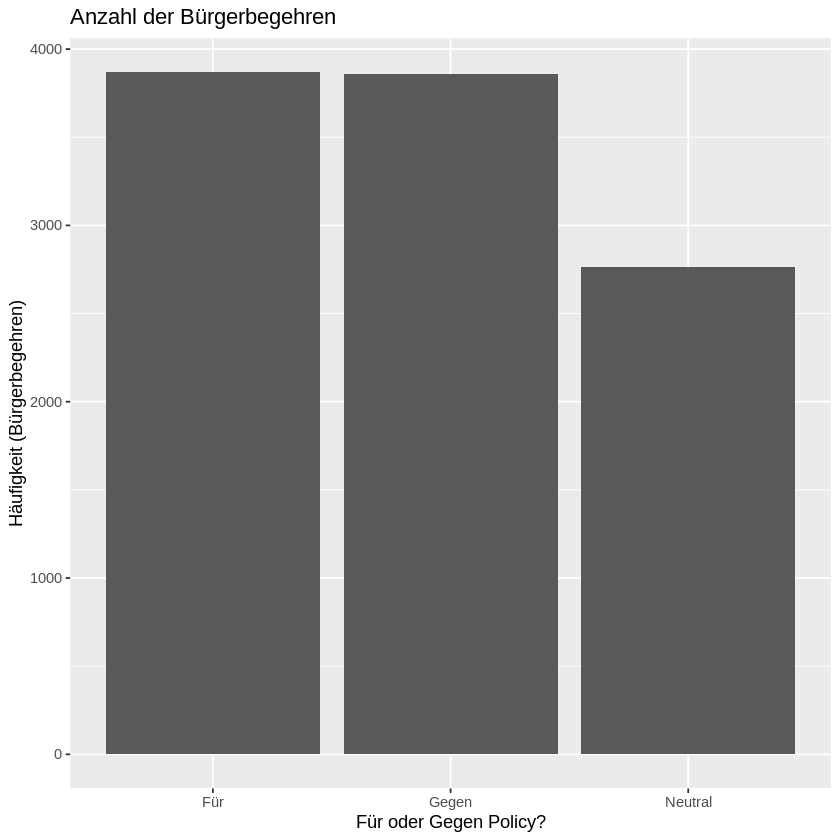

Es scheint so, als hielten sich beide Kategorien so ziemlich die Waage! Jedoch ist unser Wörterbuch mit jeweils einem Wort auch noch sehr sehr unpräzise. Je präziser das Wörterbuch, desto genauer die Ergebnisse. Jedoch wird die Erstellung der Wörterbücher bei mehr Wörtern zunehmend komplizierter!